## Change-one examination

In [51]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/experiments/batch_size.csv', index_col=0)
df.head()

,loss,accuracy,avs_dist,avs_l1,avs_l2,history,elapsed
batch_size,,,,,,,
1024,3.499090,0.355829,0.536406,0.223627,0.132782,"{'loss': [6.075534343719482, 4.41115665435791,...",489.468581
512,3.481976,0.359072,0.534223,0.222867,0.132636,"{'loss': [5.371488571166992, 4.16044282913208,...",303.772297
256,3.466209,0.356818,0.534131,0.222863,0.132169,"{'loss': [5.2296648025512695, 4.14607095718383...",258.996341
128,3.471875,0.358637,0.534439,0.222885,0.132509,"{'loss': [4.776972770690918, 4.026703357696533...",200.643039
64,3.506744,0.350183,0.540906,0.226038,0.134381,"{'loss': [4.665635108947754, 4.125868797302246...",279.678299


In [52]:
def get_stats(df):
    ser = pd.Series()
    for col in df.select_dtypes(include=np.number).columns:
        ser[f'{col}_mean'] = df[col].mean()
        ser[f'{col}_std'] = df[col].std()
    return ser
    
res = df.groupby(df.index).apply(get_stats)
res.head()

,loss_mean,loss_std,accuracy_mean,accuracy_std,avs_dist_mean,avs_dist_std,avs_l1_mean,avs_l1_std,avs_l2_mean,avs_l2_std,elapsed_mean,elapsed_std
batch_size,,,,,,,,,,,,
32,3.593750,0.066060,0.330161,0.013622,0.557648,0.012337,0.232430,0.004668,0.137995,0.002820,256.333521,33.830331
64,3.505477,0.001499,0.349365,0.002299,0.541767,0.002188,0.226168,0.001459,0.134404,0.001100,206.399496,63.834285
128,3.480247,0.007300,0.356383,0.001969,0.535782,0.001364,0.223458,0.000882,0.132686,0.000765,227.141082,24.181266
256,3.470975,0.005448,0.357030,0.001498,0.534805,0.001271,0.223086,0.000581,0.132420,0.000411,275.703980,41.427912
512,3.485206,0.008222,0.356373,0.004303,0.535667,0.004335,0.223247,0.001645,0.132535,0.001167,326.608449,25.372604


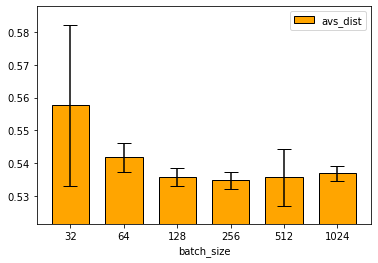

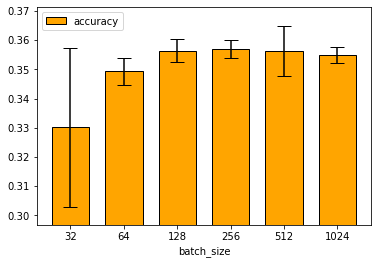

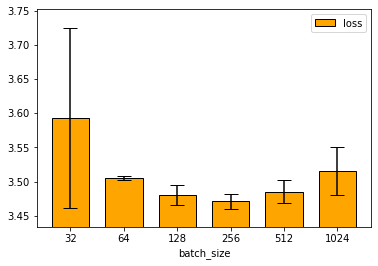

In [53]:
import matplotlib.pyplot as plt
 
def plot_col(df, col, ylabel=''):
    barWidth = 0.7
    mean = res[f'{col}_mean']
    yer = res[f'{col}_std'] * 2
    yer = yer.fillna(0)

    # The x position of bars
    x_pos = np.arange(len(mean))
    bot, top = (mean - yer).min(), (mean + yer).max()
    padding = (top - bot) * 0.1
    bot, top = bot - padding, top + padding

    # Create bars
    plt.bar(x_pos, mean, width = barWidth, color = 'orange', edgecolor = 'black', yerr=yer, capsize=7, label=f'{col}')

    # General layout
    plt.xticks([x for x in range(len(mean))], df.index)
    plt.xlabel(df.index.name)
    plt.ylabel(ylabel)
    plt.ylim(bot, top)
    plt.legend()
    
    plt.show()
    
plot_col(res, 'avs_dist')
plot_col(res, 'accuracy')
plot_col(res, 'loss')